                                                        IMAGE CLASSFIER USING SEQUENTIAL API
                                                            (using classification MLPs)

                                                            

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

LOADING MNIST USING KERAS RATHER THEN SCIKIT-LEARN, EVERY IMAGE IS REPRESENTED AS A 28X28 ARRAY RATHER THAN 1D ARRAY OF SIZE 784.

In [4]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

THE DATASET HAS ALREADY BEEN SPLIT INTO A TRAINING AND A TEST SET, BUT THERE IS NO VALIDATION SET

ALSO FOR SIMPLICITY SCALE DOWN THE PIXEL INTENSITIES DOWN TO 0-1 RANGE BY DIVIDING THEM BY 255.0 (NORMALIZE)

In [8]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

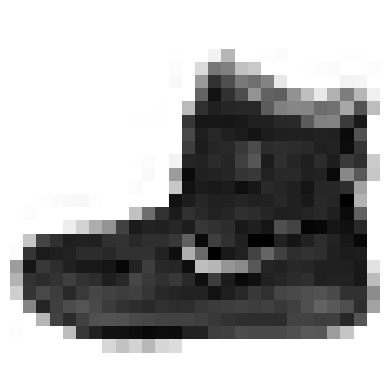

In [18]:
#EX
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

LABELS ARE CLASS IDs, from 0 to 9

In [19]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Labels

Each training and test example is assigned to one of the following labels:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [21]:
class_names[y_train[0]]

'Ankle boot'

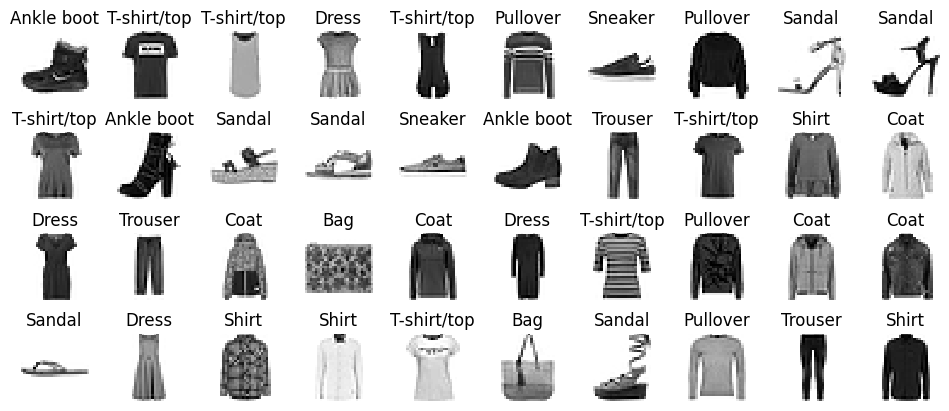

In [22]:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [23]:
tf.random.set_seed(42)

#creates a sequential API
model = tf.keras.Sequential() 

#builds the first layer. Converts each input image into a 1D array.
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28])) 
model.add(tf.keras.layers.Flatten())

#adds a dense hidden layer with 300 neurons
model.add(tf.keras.layers.Dense(300, activation="relu"))

#adds a dense hidden layer with 100 neurons
model.add(tf.keras.layers.Dense(100, activation="relu"))

#finally add a dense output layer with 10(one for each) neurons using softmax activation(exclusive classes)
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary() #only trainable parameters...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


MODEL'S LIST OF LAYERS, FETCHING BY THE INDEX OR BY THE NAME...

In [25]:
model.layers

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05647921, -0.05591325, -0.01214832, ..., -0.0083046 ,
         0.02632777, -0.02034271],
       [ 0.0078771 , -0.00965487, -0.05945283, ..., -0.02877286,
         0.07091315, -0.04543003],
       [-0.02384689, -0.01536334, -0.07084674, ..., -0.04611459,
         0.06002897, -0.04802013],
       ...,
       [-0.07192567,  0.07432652, -0.01569115, ...,  0.04362816,
        -0.0511838 ,  0.07272583],
       [-0.05768428, -0.00595474,  0.06531745, ...,  0.07421626,
         0.02589292, -0.05721071],
       [ 0.03650915,  0.0145833 ,  0.06500527, ..., -0.01096196,
        -0.0735224 ,  0.01715513]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape


(300,)

In [32]:
model.compile(loss="sparse_categorical_crossentropy", #Computes the crossentropy loss between the labels and predictions.
              optimizer="sgd", #Stochastic Gradient Descent.
              metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7189 - accuracy: 0.7639 - val_loss: 0.5047 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4852 - accuracy: 0.8312 - val_loss: 0.4657 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8466 - val_loss: 0.4213 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8557 - val_loss: 0.3912 - val_accuracy: 0.8602
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3914 - accuracy: 0.8632 - val_loss: 0.3873 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8676 - val_loss: 0.3915 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8711 - val_loss: 0.3703 - val_accuracy: 0.8694
Epo

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


The model performed better on the validation set than on the training set at the beginning of training

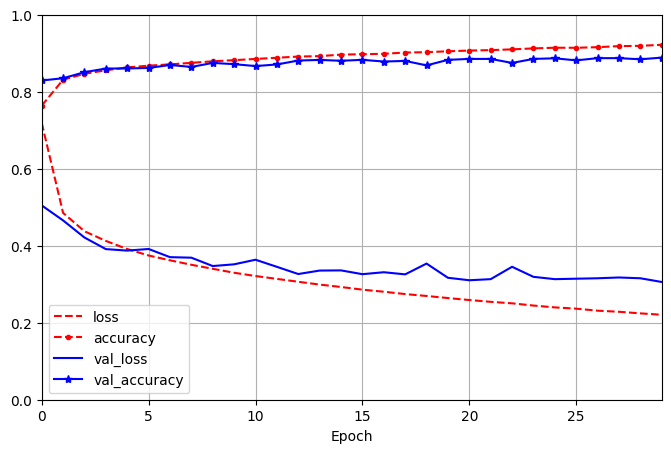

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8855


[0.3219067454338074, 0.8855000138282776]

MAKING PREDICTIONS

In [38]:
n=20

In [39]:
X_new = X_test[:n]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 135ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.01, 0.  , 0.01, 0.  , 0.91, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.09, 0.  , 0.88, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.66, 0.  , 0.32, 0.02, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.07, 0.  , 0.

In [40]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0],
      dtype=int64)

In [41]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker', 'Coat', 'Sandal', 'Sandal',
       'Dress', 'Coat', 'Trouser', 'Pullover', 'Pullover', 'Bag',
       'T-shirt/top'], dtype='<U11')

In [42]:
y_new = y_test[:n]
y_new

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

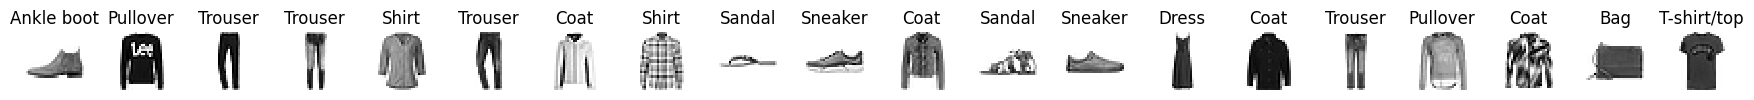

In [43]:
plt.figure(figsize=(n+2, n))
for index, image in enumerate(X_new):
    plt.subplot(1, n, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()